<a href="https://colab.research.google.com/github/SarahBlevin/AAA_Project_Internet_addicts/blob/main/AAA_InternetAddicts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAA Project - FPS benchmark

This project's goal is to predict the FPS (numerical value) of video games executed on computers, using machine learning.

The dataset used in this project can be found here: https://www.kaggle.com/datasets/ulrikthygepedersen/fps-benchmark

or here: https://www.openml.org/search?type=data&status=active&id=42737

# Imports and Utility functions

In [1]:
# All lib imports
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import zipfile
import urllib.request
import pandas as pd

import seaborn as sns


In [2]:
# To plot pretty figures
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_NAME = "fps_benchmark"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_NAME)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Data access instructions

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/SarahBlevin/AAA_Project_Internet_addicts/master/"
FPS_BENCHMARK_PATH = os.path.join("dataset", "fps_benchmark")
FPS_BENCHMARK_URL = DOWNLOAD_ROOT + "dataset/fps_benchmark.zip"

def fetch_fps_benchmark_data(fps_benchmark_url=FPS_BENCHMARK_URL, fps_benchmark_path=FPS_BENCHMARK_PATH):
    if not os.path.isdir(fps_benchmark_path):
        os.makedirs(fps_benchmark_path)
    zip_path = os.path.join(fps_benchmark_path, "fps_benchmark.zip")
    urllib.request.urlretrieve(fps_benchmark_url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as fps_benchmark_zip:
      fps_benchmark_zip.extractall(path=fps_benchmark_path)
    print("Extracted files:", os.listdir(fps_benchmark_path))

In [4]:
fetch_fps_benchmark_data()

Extracted files: ['fps_benchmark_dataset', 'fps_benchmark.zip']


In [5]:
def load_fps_benchmark_data(fps_benchmark_path=FPS_BENCHMARK_PATH):
    csv_path = os.path.join(fps_benchmark_path, "fps_benchmark_dataset","fps_benchmark.csv")
    return pd.read_csv(csv_path)

# Dataset exploratory analysis



## Metadata

In [6]:
fps_benchmark_data = load_fps_benchmark_data()
fps_benchmark_data.head()

,CpuName,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL2,CpuCacheL3,CpuDieSize,CpuFrequency,CpuMultiplier,...,GpuShaderModel,GpuNumberOfShadingUnits,GpuNumberOfTMUs,GpuTextureRate,GpuNumberOfTransistors,GpuVulkan,GameName,GameResolution,GameSetting,FPS
0,b'Intel Core i9-9900K',8.0,16.0,100.0,512.0,2048.0,16.0,NaN,3600.0,36.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',225.3
1,b'Intel Core i7-9700K',8.0,8.0,100.0,512.0,2048.0,12.0,NaN,3600.0,36.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',223.3
2,b'Intel Core i7-8700K',6.0,12.0,100.0,384.0,1536.0,12.0,NaN,3700.0,37.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',207.3
3,b'Intel Core i7-7700K',4.0,8.0,100.0,256.0,1024.0,8.0,NaN,4200.0,42.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',201.3
4,b'Intel Core i5-9400F',6.0,6.0,100.0,384.0,1536.0,9.0,NaN,2900.0,29.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',199.2


In [7]:
fps_benchmark_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24624 entries, 0 to 24623
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CpuName                    24624 non-null  object 
 1   CpuNumberOfCores           24624 non-null  float64
 2   CpuNumberOfThreads         24624 non-null  float64
 3   CpuBaseClock               24624 non-null  float64
 4   CpuCacheL1                 24624 non-null  float64
 5   CpuCacheL2                 24624 non-null  float64
 6   CpuCacheL3                 24624 non-null  float64
 7   CpuDieSize                 11664 non-null  float64
 8   CpuFrequency               24624 non-null  float64
 9   CpuMultiplier              24624 non-null  float64
 10  CpuMultiplierUnlocked      24624 non-null  object 
 11  CpuProcessSize             24624 non-null  float64
 12  CpuTDP                     24624 non-null  float64
 13  CpuNumberOfTransistors     11664 non-null  flo

We notice that GpuNumberOfExecutionUnits is completely empty.

GpuNumbersOfComputeUnits and CpuNumberOfTransistors and CpuDieSize have very high numbers of null values (over 50%)

In [8]:
numerical_features = fps_benchmark_data.select_dtypes(exclude=['object'])
print(len(numerical_features.columns))

categorical_features = fps_benchmark_data.select_dtypes('object')
print(len(categorical_features.columns))

31
13


There are 31 numerical features and 13 categorical features

In [9]:

fps_benchmark_data['GameName'].value_counts()

,count
GameName,
b'callOfDutyWW2',1026
b'fortnite',1026
b'grandTheftAuto5',1026
b'rainbowSixSiege',1026
b'starcraft2',1026
b'farCry5',1026
b'battletech',1026
b'airMechStrike',1026
b'warframe',1026


There are 30 video games available for predictions

In [10]:
fps_benchmark_data.describe()

,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL2,CpuCacheL3,CpuDieSize,CpuFrequency,CpuMultiplier,CpuProcessSize,...,GpuMemorySize,GpuPixelRate,GpuProcessSize,GpuNumberOfROPs,GpuNumberOfShadingUnits,GpuNumberOfTMUs,GpuTextureRate,GpuNumberOfTransistors,GameResolution,FPS
count,24624.000000,24624.000000,24624.0,24624.000000,24624.000000,24624.000000,11664.000000,24624.000000,24624.000000,24624.000000,...,24624.000000,24624.000000,24624.000000,24624.000000,24624.00000,24624.000000,24624.000000,24624.000000,24624.0,24624.000000
mean,6.315789,10.842105,100.0,515.368421,2506.105263,18.210526,0.000126,3589.473684,35.894737,11.947368,...,7333.333333,89045.925926,15.259259,57.777778,2237.62963,139.851852,215336.296296,8377.777778,1080.0,123.959369
std,2.078823,5.203982,0.0,233.521609,1398.698066,14.229906,0.000059,317.719889,3.177199,3.017095,...,2775.611026,28211.657786,5.783828,19.023439,866.31581,54.144738,83501.932511,3533.754477,0.0,54.610080
min,2.000000,4.000000,100.0,128.000000,512.000000,3.000000,0.000074,2800.000000,28.000000,7.000000,...,3000.000000,36430.000000,7.000000,24.000000,768.00000,48.000000,66820.000000,3300.000000,1080.0,22.200000
25%,6.000000,6.000000,100.0,384.000000,1536.000000,9.000000,0.000074,3400.000000,34.000000,7.000000,...,6000.000000,68360.000000,12.000000,48.000000,1536.00000,96.000000,157100.000000,5700.000000,1080.0,83.600000
50%,6.000000,12.000000,100.0,512.000000,2048.000000,16.000000,0.000074,3600.000000,36.000000,14.000000,...,8000.000000,86400.000000,14.000000,64.000000,2304.00000,144.000000,202000.000000,7200.000000,1080.0,114.300000
75%,8.000000,16.000000,100.0,576.000000,3072.000000,32.000000,0.000192,3800.000000,38.000000,14.000000,...,8000.000000,109400.000000,16.000000,64.000000,2560.00000,160.000000,277300.000000,10800.000000,1080.0,154.100000
max,12.000000,24.000000,100.0,1152.000000,6144.000000,64.000000,0.000192,4200.000000,42.000000,14.000000,...,16000.000000,139200.000000,28.000000,96.000000,4352.00000,272.000000,420200.000000,18600.000000,1080.0,396.400000


Saving figure attribute_histogram_plots


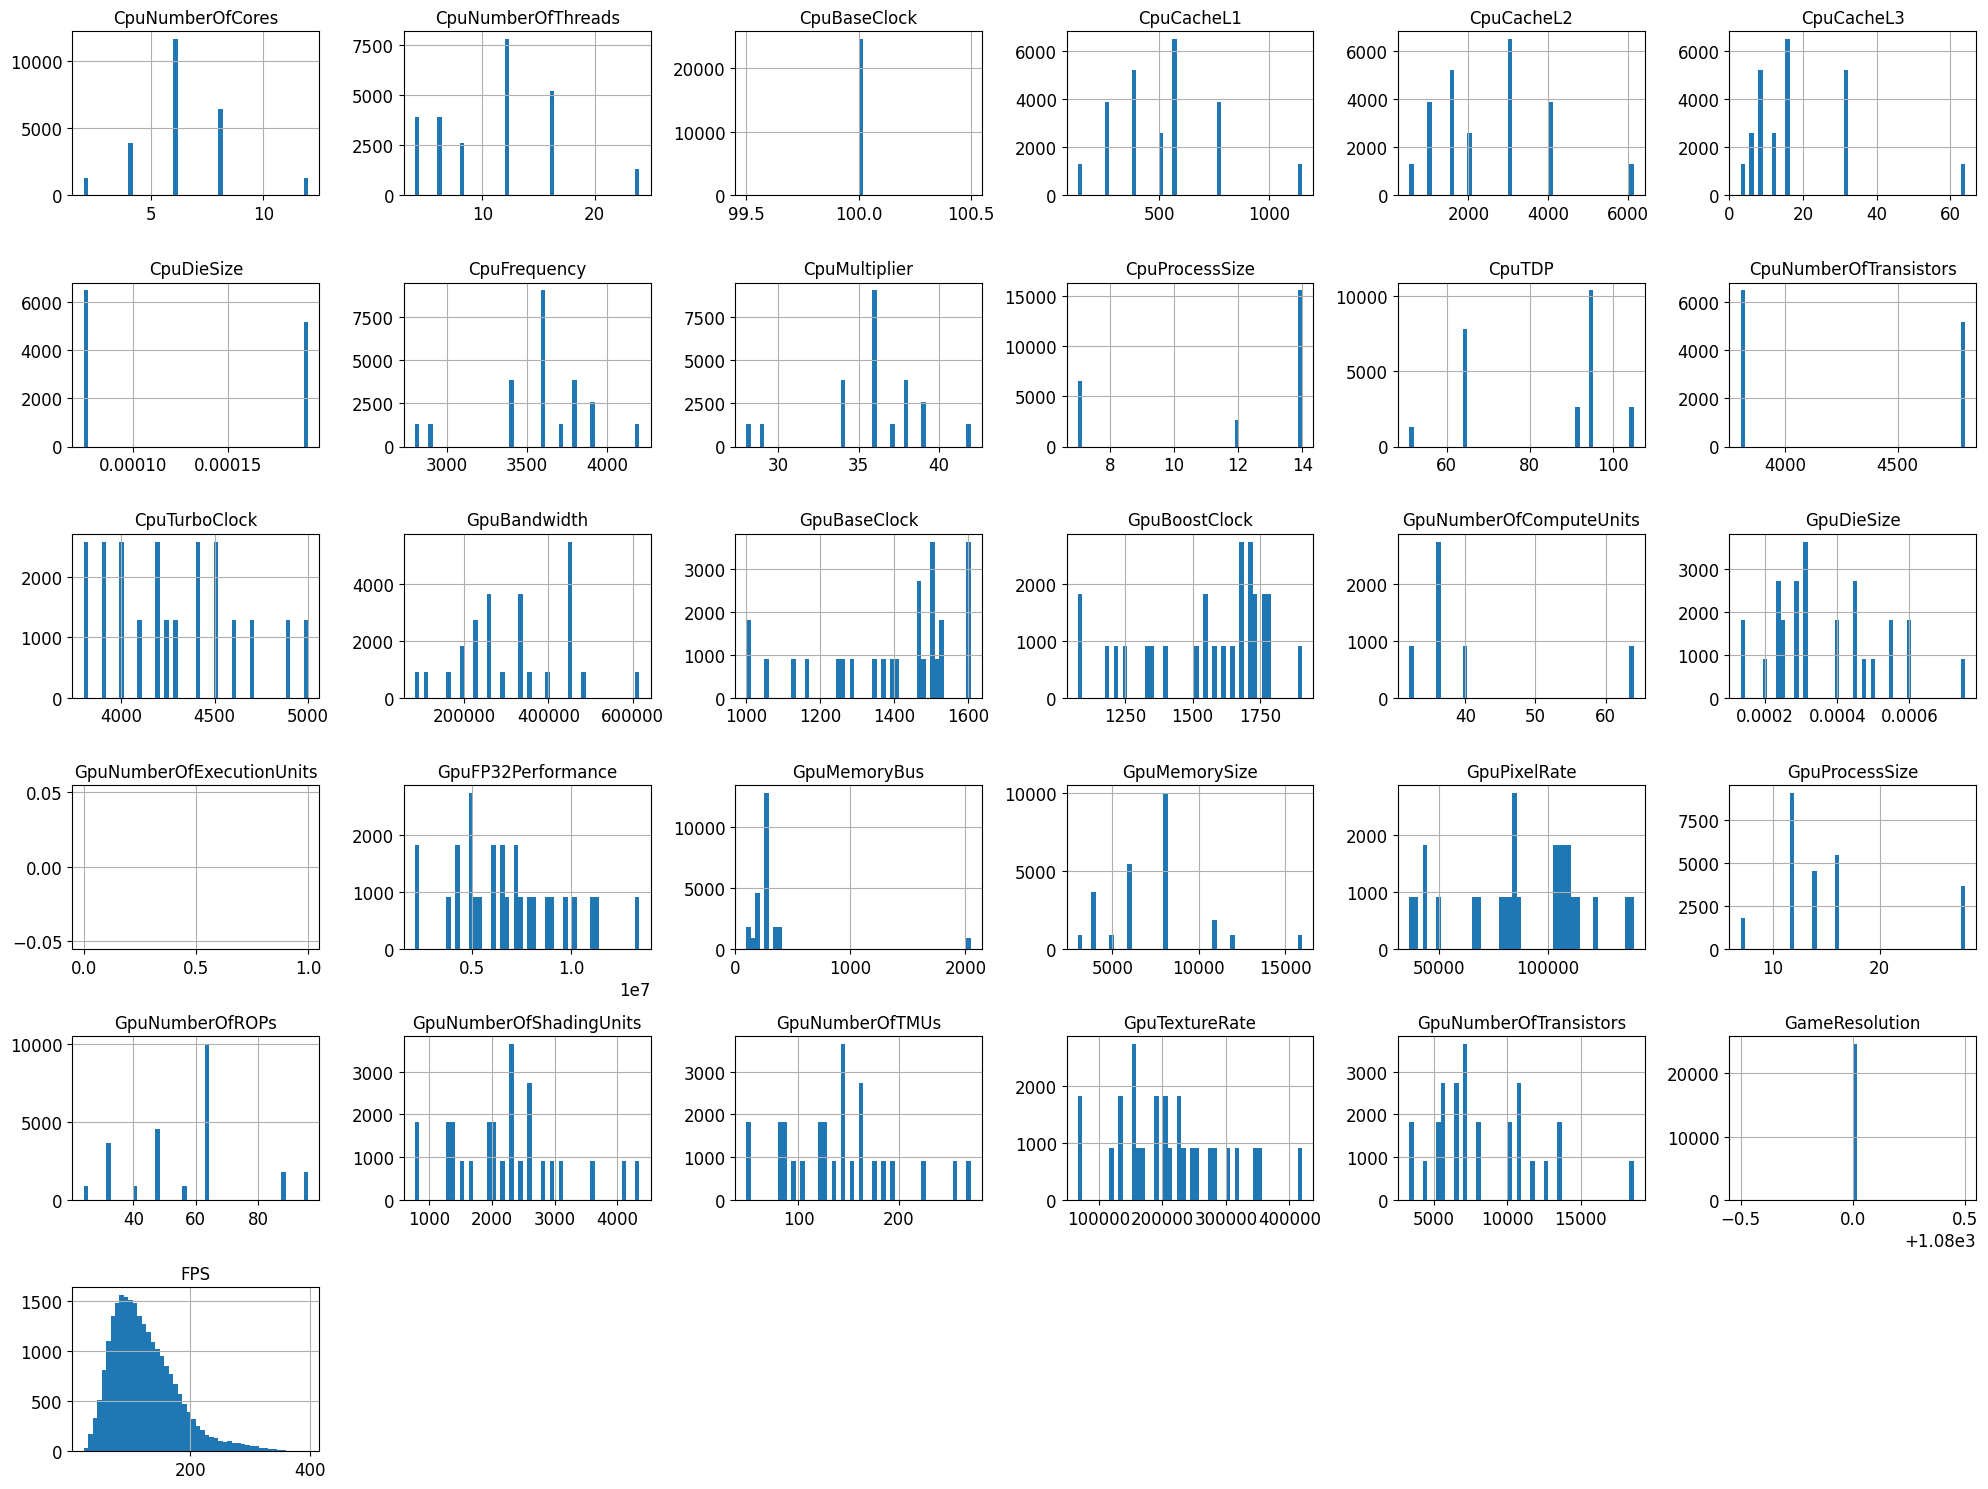

In [11]:

fps_benchmark_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()



We notice that the game resolution and the cpu base clock are constants.
Since both CpuBaseClock and GameResolution are set to constant values (100 and 1080, respectively), they won’t provide any meaningful variation for predicting FPS.

## Correlations analysis

FPS                          1.000000
GpuPixelRate                 0.403462
GpuBandwidth                 0.390828
GpuNumberOfTransistors       0.383007
GpuTextureRate               0.375973
GpuFP32Performance           0.375971
GpuNumberOfROPs              0.338063
GpuDieSize                   0.333021
GpuNumberOfTMUs              0.325489
GpuNumberOfShadingUnits      0.325489
GpuMemorySize                0.305281
GpuNumberOfComputeUnits      0.212427
CpuTurboClock                0.171679
GpuBoostClock                0.152464
GpuBaseClock                 0.133981
CpuNumberOfCores             0.130590
CpuTDP                       0.108188
CpuNumberOfThreads           0.095203
CpuCacheL3                   0.094877
CpuCacheL1                   0.089255
GpuMemoryBus                 0.084036
CpuCacheL2                   0.069526
CpuMultiplier                0.021338
CpuFrequency                 0.021338
CpuProcessSize              -0.078404
GpuProcessSize              -0.078965
CpuNumberOfT

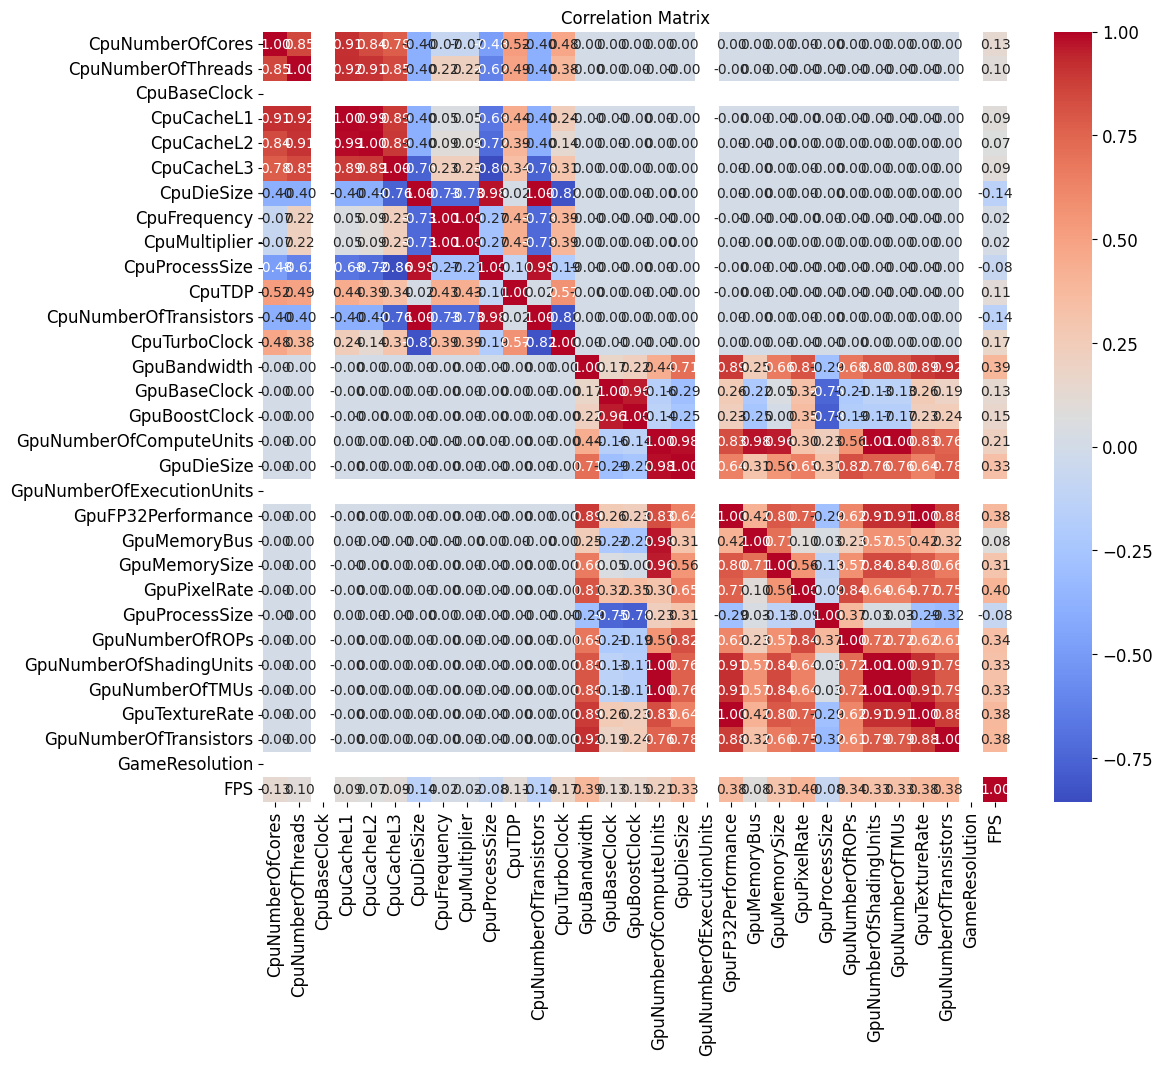

In [12]:
numerical_features = fps_benchmark_data.select_dtypes(include=['number'])

corr_matrix = numerical_features.corr()
sorted_corr_matrix = corr_matrix["FPS"].sort_values(ascending=False)
print(sorted_corr_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Saving figure scatter_matrix_plot


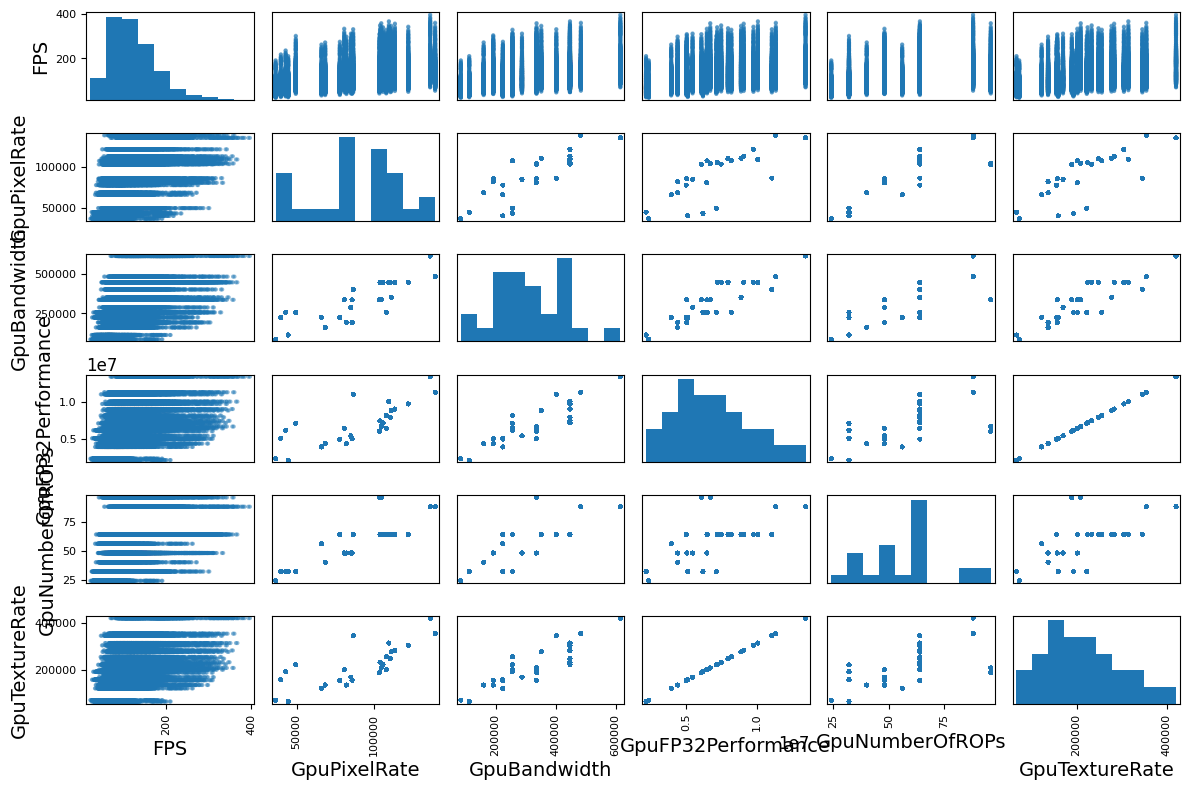

In [13]:

attributes = ["FPS", "GpuPixelRate", "GpuBandwidth", "GpuFP32Performance","GpuNumberOfROPs","GpuTextureRate"]
scatter_matrix(fps_benchmark_data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")
plt.show()

GpuPixelRate: There's a positive trend, suggesting that higher GpuPixelRate is associated with higher FPS
,GpuBandwidth: A similar positive correlation is visible, reinforcing that increased bandwidth can boost FPS.

Given the strong linear relationships between GpuPixelRate, GpuTextureRate, and GpuFP32Performance, there may be some redundancy among these features. We could consider using dimensionality reduction (like PCA) or selecting just one of these features if needed to reduce multicollinearity in a regression model.

Let us try some feature combinations:

In [14]:
# Feature combinations
fps_benchmark_data['GpuPixelRate_GpuBandwidth'] = fps_benchmark_data['GpuPixelRate'] * fps_benchmark_data['GpuBandwidth']
fps_benchmark_data['GpuFP32Performance_GpuNumberOfROPs'] = fps_benchmark_data['GpuFP32Performance'] * fps_benchmark_data['GpuNumberOfROPs']
fps_benchmark_data['GpuTextureRate_GpuBandwidth'] = fps_benchmark_data['GpuTextureRate'] / fps_benchmark_data['GpuBandwidth']
fps_benchmark_data['GpuPixelRate_GpuTextureRate_Avg'] = (fps_benchmark_data['GpuPixelRate'] + fps_benchmark_data['GpuTextureRate']) / 2
fps_benchmark_data['GpuBoostClock_CpuTurboClock_Diff'] = fps_benchmark_data['GpuBoostClock'] - fps_benchmark_data['CpuTurboClock']

# Correlation matrix with new features
numerical_features = fps_benchmark_data.select_dtypes(include=['number'])
corr_matrix = numerical_features.corr()
sorted_corr_matrix = corr_matrix["FPS"].sort_values(ascending=False)
print(sorted_corr_matrix)

FPS                                   1.000000
GpuPixelRate                          0.403462
GpuPixelRate_GpuTextureRate_Avg       0.401102
GpuPixelRate_GpuBandwidth             0.397855
GpuBandwidth                          0.390828
GpuNumberOfTransistors                0.383007
GpuFP32Performance_GpuNumberOfROPs    0.381268
GpuTextureRate                        0.375973
GpuFP32Performance                    0.375971
GpuNumberOfROPs                       0.338063
GpuDieSize                            0.333021
GpuNumberOfTMUs                       0.325489
GpuNumberOfShadingUnits               0.325489
GpuMemorySize                         0.305281
GpuNumberOfComputeUnits               0.212427
CpuTurboClock                         0.171679
GpuBoostClock                         0.152464
GpuBaseClock                          0.133981
CpuNumberOfCores                      0.130590
CpuTDP                                0.108188
CpuNumberOfThreads                    0.095203
CpuCacheL3   

The combinations GpuPixelRate * GpuBandwidth, GpuFP32Performance * GpuNumberOfROPs, and (GpuPixelRate + GpuTextureRate) / 2 are worthwhile to add because they show moderate to strong positive correlations with FPS. However, GpuTextureRate / GpuBandwidth and GpuBoostClock - CpuTurboClock are less impactful and not particularly useful for predicting FPS.

In [15]:
fps_benchmark_data = fps_benchmark_data.drop(['GpuTextureRate_GpuBandwidth', 'GpuBoostClock_CpuTurboClock_Diff'], axis=1)

Features that show weaker or negative correlations, such as CPU characteristics or certain memory attributes, could be less critical in determining FPS and may not need as much focus for optimization.

## Target feature study

In [16]:
fps_benchmark_data["FPS"].describe()

,FPS
count,24624.000000
mean,123.959369
std,54.610080
min,22.200000
25%,83.600000
50%,114.300000
75%,154.100000
max,396.400000


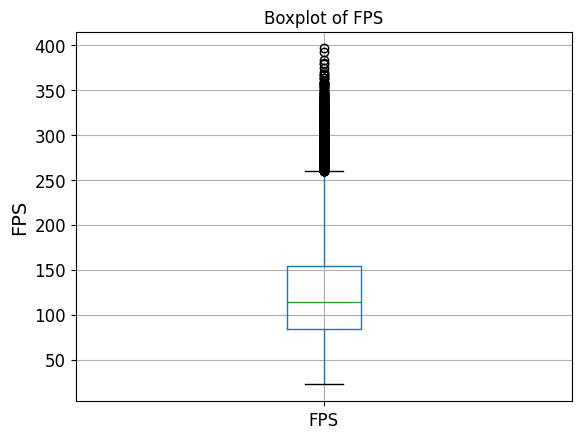

In [17]:
fps_benchmark_data.boxplot(column="FPS")
plt.title(f'Boxplot of FPS')
plt.ylabel("FPS")
plt.show()

We notice that for our target, which is FPS, most values are between 80 and 150, with some values going as high as 250, so the standard deviation is pretty high

## Correcting missing values and constants
We will now focus on dealing with the columns that we identified with large numbers of missing inputs and how to procede with these.

In [18]:
lacking_columns = ["FPS","GpuNumberOfExecutionUnits", "GpuNumberOfComputeUnits", "CpuNumberOfTransistors", "CpuDieSize"]
corr_matrix = fps_benchmark_data[lacking_columns].corr()

corr_matrix["FPS"].sort_values(ascending=False)

,FPS
FPS,1.000000
GpuNumberOfComputeUnits,0.212427
CpuNumberOfTransistors,-0.140563
CpuDieSize,-0.140563
GpuNumberOfExecutionUnits,NaN


So it is quite obvious that GpuNumberOfExecutionUnits who has 0 values has no impact on the target which is FPS. Therefore we'll remove it.

The 3 other parameters have a relatively strong correlation (>0.1 in absolute value) so it'd be a shame to get rid of these.

In [19]:
lacking_columns = ["GpuNumberOfComputeUnits","CpuNumberOfTransistors","CpuDieSize"]

fps_benchmark_data[lacking_columns].describe()


,GpuNumberOfComputeUnits,CpuNumberOfTransistors,CpuDieSize
count,5472.000000,11664.000000,11664.000000
mean,40.666667,4244.444444,0.000126
std,10.688456,496.925297,0.000059
min,32.000000,3800.000000,0.000074
25%,36.000000,3800.000000,0.000074
50%,36.000000,3800.000000,0.000074
75%,40.000000,4800.000000,0.000192
max,64.000000,4800.000000,0.000192


Since most values are identical for these 3 features, it seems the most optimal way to fill the blanks is to replace the null values with the median value

In [20]:
clean_fps_benchmark_data = fps_benchmark_data.drop("GpuNumberOfExecutionUnits",axis=1)

for feature in lacking_columns:
  clean_fps_benchmark_data[feature]=clean_fps_benchmark_data[feature].fillna(clean_fps_benchmark_data[feature].median())

clean_fps_benchmark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24624 entries, 0 to 24623
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CpuName                             24624 non-null  object 
 1   CpuNumberOfCores                    24624 non-null  float64
 2   CpuNumberOfThreads                  24624 non-null  float64
 3   CpuBaseClock                        24624 non-null  float64
 4   CpuCacheL1                          24624 non-null  float64
 5   CpuCacheL2                          24624 non-null  float64
 6   CpuCacheL3                          24624 non-null  float64
 7   CpuDieSize                          24624 non-null  float64
 8   CpuFrequency                        24624 non-null  float64
 9   CpuMultiplier                       24624 non-null  float64
 10  CpuMultiplierUnlocked               24624 non-null  object 
 11  CpuProcessSize                      24624

Since constant features don’t contribute to the model’s predictive power, we choose to remove CpuBaseClock and GameResolution from the dataset.  Removing these variables will reduce dimensionality, which can simplify the model and potentially improve its interpretability and performance.

The base clock or resolution could vary in real-world scenarios, so we could consider gathering more data. However we will not do that in this project for lack of time.

In [21]:
clean_fps_benchmark_data = clean_fps_benchmark_data.drop(["CpuBaseClock", "GameResolution"], axis=1)